In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

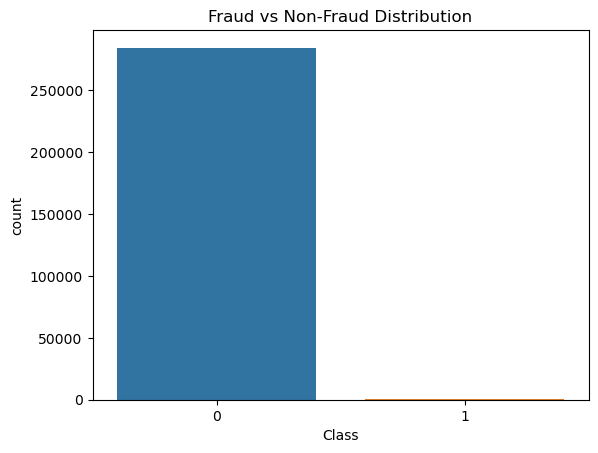

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [6]:
sns.countplot(x="Class", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

fraud_ratio = df["Class"].value_counts(normalize=True) * 100
print(fraud_ratio)

In [7]:
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

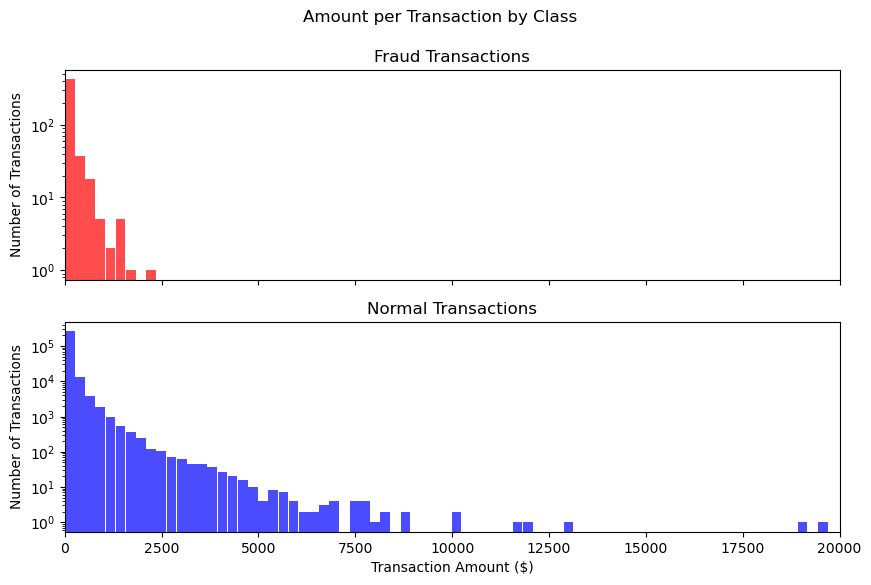

In [8]:
bins = np.linspace(0, 26000, 100)
bin_centers = (bins[:-1] + bins[1:]) / 2

fraud_counts, _ = np.histogram(fraud["Amount"], bins=bins)
normal_counts, _ = np.histogram(normal["Amount"], bins=bins)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

fig.suptitle("Amount per Transaction by Class")

ax1.bar(bin_centers, fraud_counts, width=250, color="red", alpha=0.7)
ax1.set_title("Fraud Transactions")
ax1.set_ylabel("Number of Transactions")

ax2.bar(bin_centers, normal_counts, width=250, color="blue", alpha=0.7)
ax2.set_title("Normal Transactions")
ax2.set_xlabel("Transaction Amount ($)")
ax2.set_ylabel("Number of Transactions")

ax1.set_yscale("log")
ax2.set_yscale("log")

plt.xlim((0, 20000)) 
plt.show()

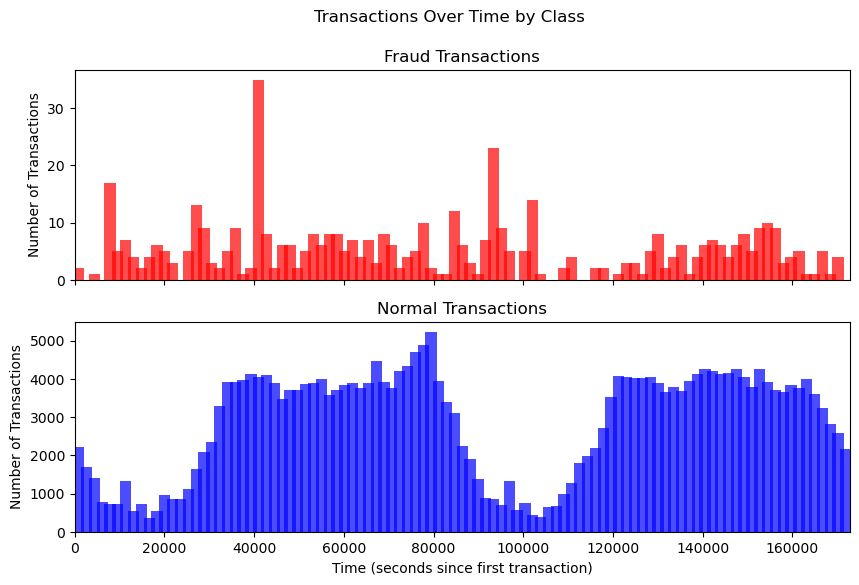

In [9]:
bins = np.linspace(df["Time"].min(), df["Time"].max(), 100)
bin_centers = (bins[:-1] + bins[1:]) / 2

fraud_counts, _ = np.histogram(fraud["Time"], bins=bins)
normal_counts, _ = np.histogram(normal["Time"], bins=bins)

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

fig.suptitle("Transactions Over Time by Class")

ax1.bar(bin_centers, fraud_counts, width=2500, color="red", alpha=0.7)
ax1.set_title("Fraud Transactions")
ax1.set_ylabel("Number of Transactions")

ax2.bar(bin_centers, normal_counts, width=2500, color="blue", alpha=0.7)
ax2.set_title("Normal Transactions")
ax2.set_xlabel("Time (seconds since first transaction)")
ax2.set_ylabel("Number of Transactions")

plt.xlim((df["Time"].min(), df["Time"].max())) 
plt.show()


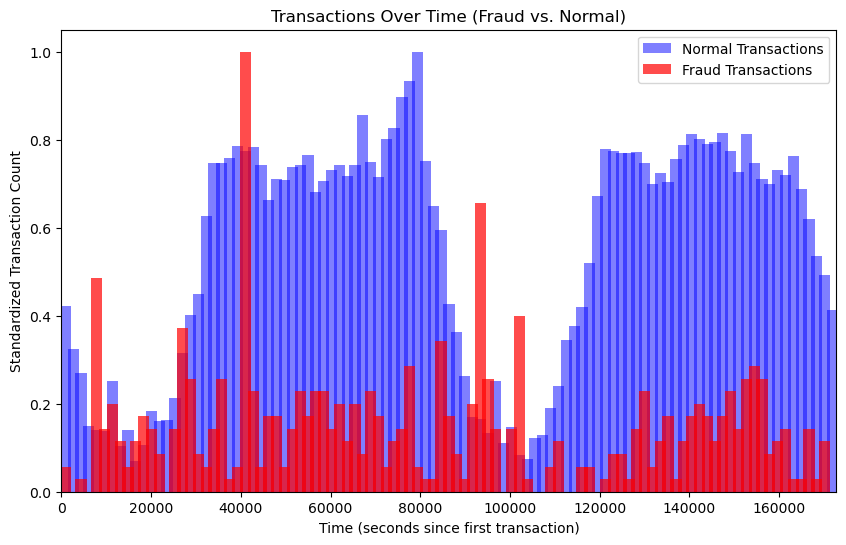

In [10]:
fraud_counts = fraud_counts / fraud_counts.max()
normal_counts = normal_counts / normal_counts.max()

plt.figure(figsize=(10, 6))
plt.title("Transactions Over Time (Fraud vs. Normal)")

plt.bar(bin_centers, normal_counts, width=2500, color="blue", alpha=0.5, label="Normal Transactions")
plt.bar(bin_centers, fraud_counts, width=2500, color="red", alpha=0.7, label="Fraud Transactions")

plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Standardized Transaction Count")
plt.legend()
plt.xlim((df["Time"].min(), df["Time"].max()))

plt.show()

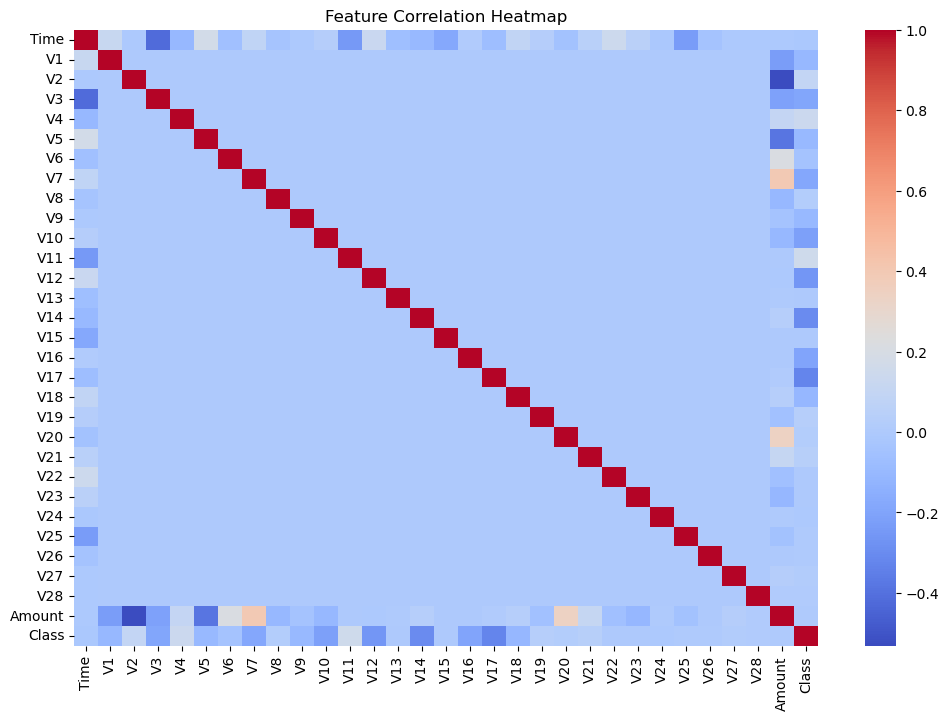

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

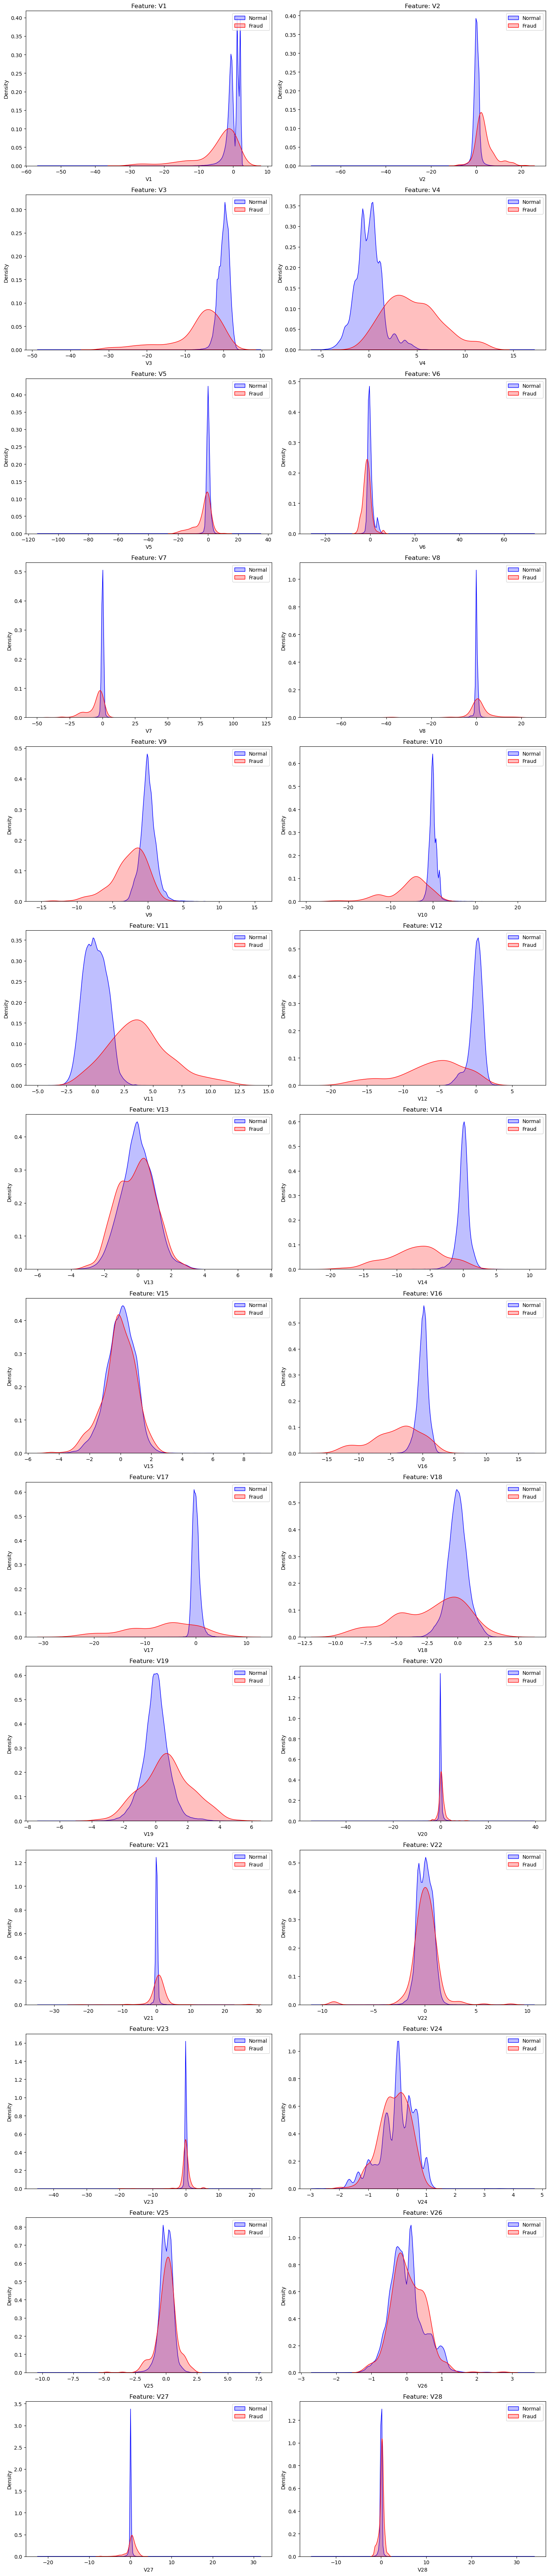

In [12]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

num_features = len(features)
cols = 2
rows = int(np.ceil(num_features / cols)) 

plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(features):
    plt.subplot(rows, cols, i+1)

    sns.kdeplot(df[df["Class"] == 0][feature], label="Normal", color="blue", fill=True)
    sns.kdeplot(df[df["Class"] == 1][feature], label="Fraud", color="red", fill=True)
    
    plt.title(f"Feature: {feature}")
    plt.legend()


plt.tight_layout()
plt.show()

### SMOTE FOR OVERSAMPLING

In [13]:
X = df.drop(columns=["Class"])
y = df["Class"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)  
df_resampled["Class"] = y_resampled

print("Class distribution after SMOTE:")
print(df_resampled["Class"].value_counts())

Class distribution after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


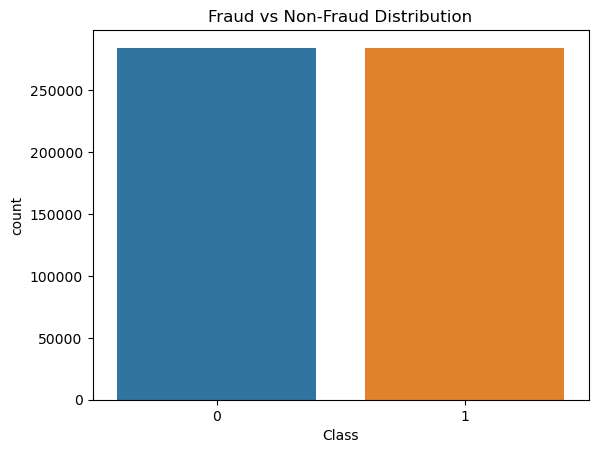

In [14]:
sns.countplot(x="Class", data=df_resampled)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

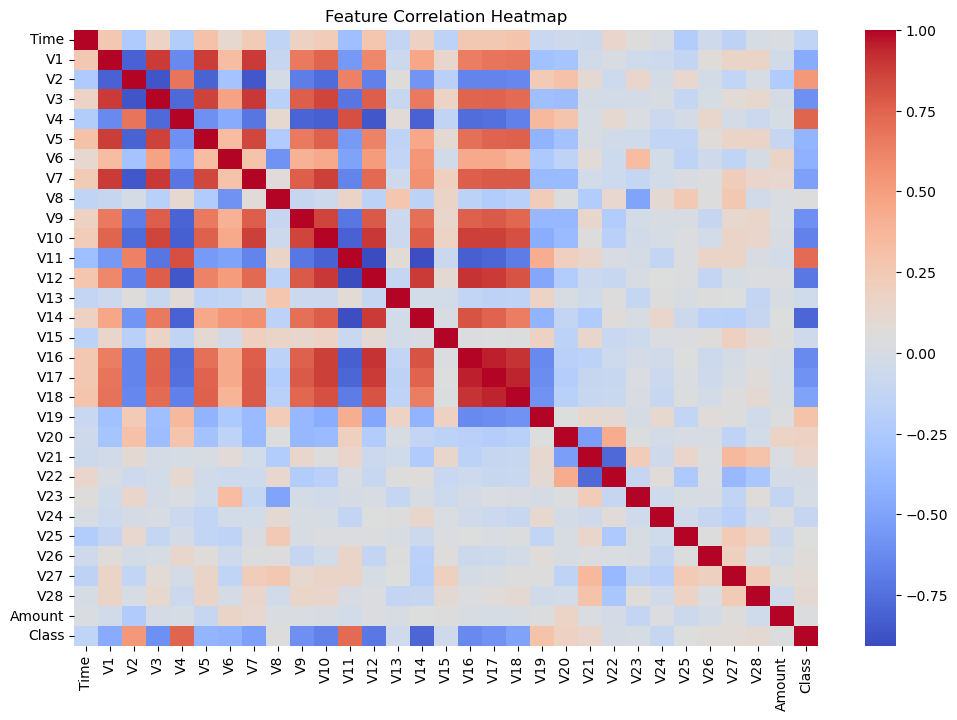

In [15]:
corr_matrix = df_resampled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

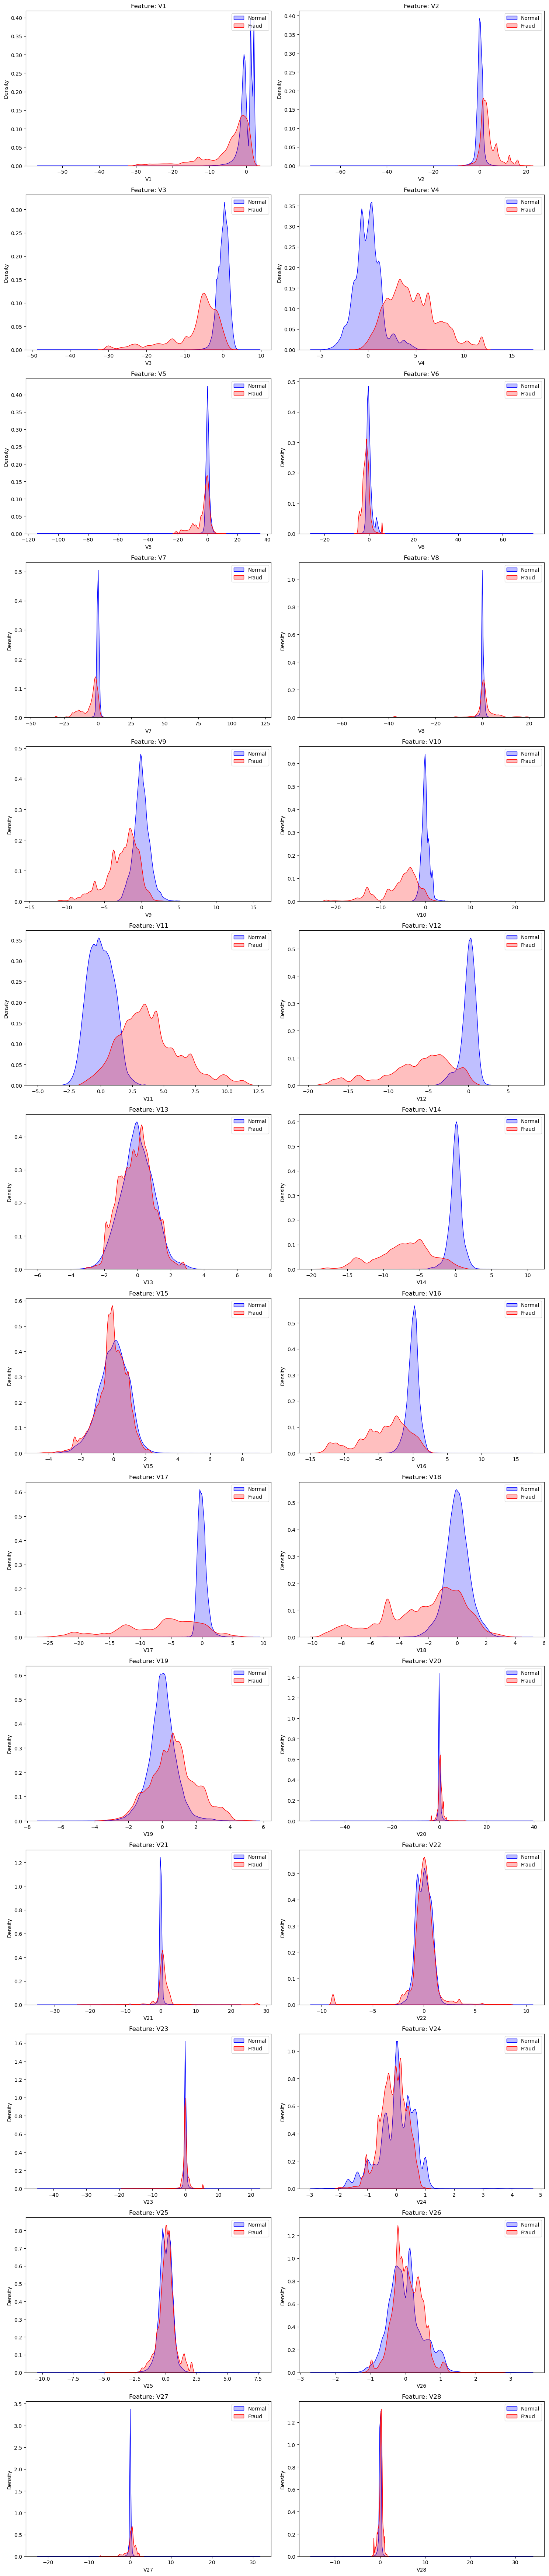

In [16]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

num_features = len(features)
cols = 2
rows = int(np.ceil(num_features / cols)) 

plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(features):
    plt.subplot(rows, cols, i+1)

    sns.kdeplot(df_resampled[df_resampled["Class"] == 0][feature], label="Normal", color="blue", fill=True)
    sns.kdeplot(df_resampled[df_resampled["Class"] == 1][feature], label="Fraud", color="red", fill=True)
    
    plt.title(f"Feature: {feature}")
    plt.legend()


plt.tight_layout()
plt.show()

In [17]:
resampled_fraud = df_resampled[df_resampled["Class"] == 1]
resampled_normal = df_resampled[df_resampled["Class"] == 0]

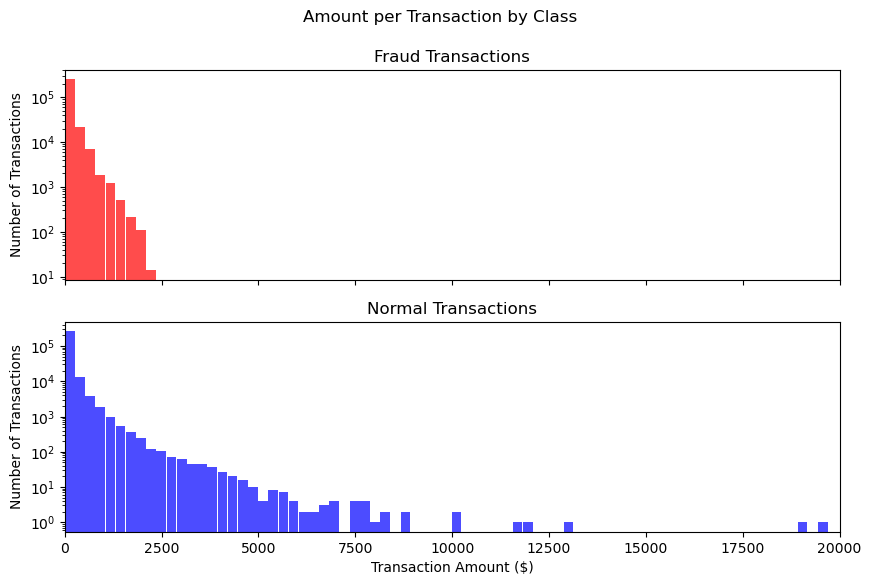

In [18]:
bins = np.linspace(0, 26000, 100)
bin_centers = (bins[:-1] + bins[1:]) / 2

fraud_counts, _ = np.histogram(resampled_fraud["Amount"], bins=bins)
normal_counts, _ = np.histogram(resampled_normal["Amount"], bins=bins)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

fig.suptitle("Amount per Transaction by Class")

ax1.bar(bin_centers, fraud_counts, width=250, color="red", alpha=0.7)
ax1.set_title("Fraud Transactions")
ax1.set_ylabel("Number of Transactions")

ax2.bar(bin_centers, normal_counts, width=250, color="blue", alpha=0.7)
ax2.set_title("Normal Transactions")
ax2.set_xlabel("Transaction Amount ($)")
ax2.set_ylabel("Number of Transactions")

ax1.set_yscale("log")
ax2.set_yscale("log")

plt.xlim((0, 20000)) 
plt.show()

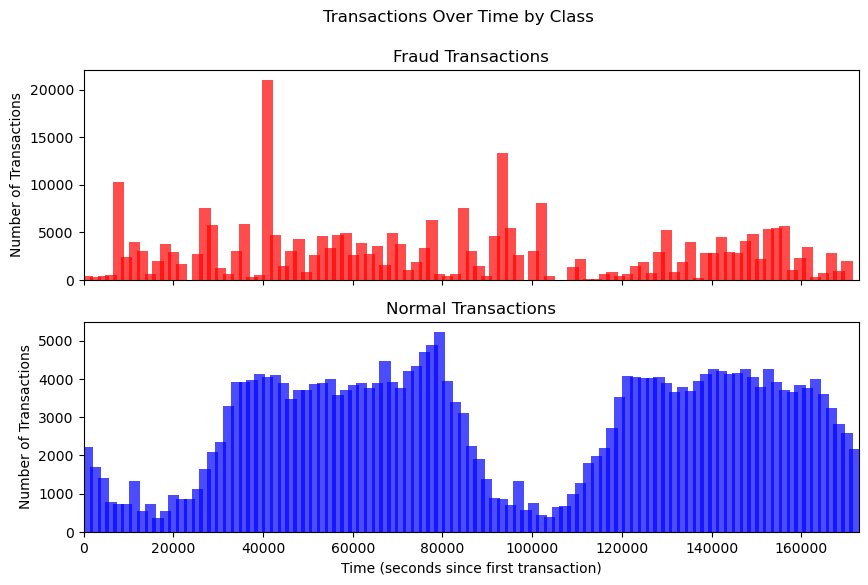

In [19]:
bins = np.linspace(df_resampled["Time"].min(), df_resampled["Time"].max(), 100)
bin_centers = (bins[:-1] + bins[1:]) / 2

resampled_fraud_counts, _ = np.histogram(resampled_fraud["Time"], bins=bins)
resampled_normal_counts, _ = np.histogram(resampled_normal["Time"], bins=bins)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

fig.suptitle("Transactions Over Time by Class")

ax1.bar(bin_centers, resampled_fraud_counts, width=2500, color="red", alpha=0.7)
ax1.set_title("Fraud Transactions")
ax1.set_ylabel("Number of Transactions")

ax2.bar(bin_centers, resampled_normal_counts, width=2500, color="blue", alpha=0.7)
ax2.set_title("Normal Transactions")
ax2.set_xlabel("Time (seconds since first transaction)")
ax2.set_ylabel("Number of Transactions")

plt.xlim((df_resampled["Time"].min(), df_resampled["Time"].max())) 
plt.show()

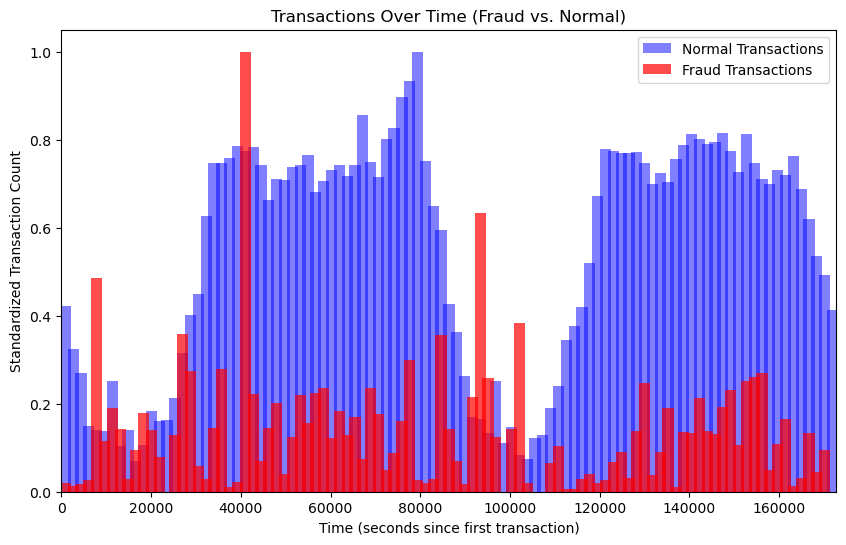

In [20]:
resampled_fraud_counts = resampled_fraud_counts / resampled_fraud_counts.max()
reasmpled_normal_counts = resampled_normal_counts / resampled_normal_counts.max()

plt.figure(figsize=(10, 6))
plt.title("Transactions Over Time (Fraud vs. Normal)")

plt.bar(bin_centers, reasmpled_normal_counts, width=2500, color="blue", alpha=0.5, label="Normal Transactions")
plt.bar(bin_centers, resampled_fraud_counts, width=2500, color="red", alpha=0.7, label="Fraud Transactions")

plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Standardized Transaction Count")
plt.legend()
plt.xlim((df_resampled["Time"].min(), df_resampled["Time"].max()))

plt.show()

### Logistic Regression

##### without SMOTE


Model Performance Metrics:
Accuracy: 0.9755
Precision: 0.0610
Recall: 0.9184
F1-Score: 0.1144
ROC-AUC Score: 0.9721

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



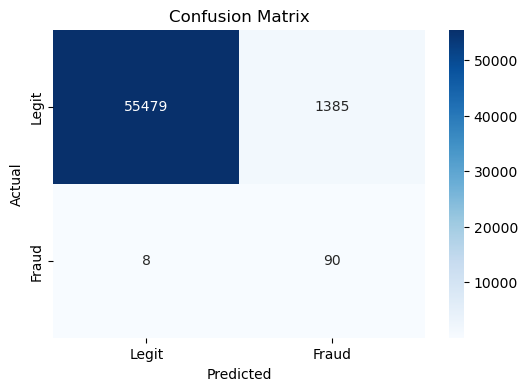


Top 10 Most Important Features:
   Feature  Importance
29  Amount    2.339666
1       V1    1.708365
14     V14    1.489999
4       V4    1.337322
10     V10    1.336333
5       V5    1.208096
12     V12    1.123274
16     V16    0.990129
17     V17    0.988866
20     V20    0.922671


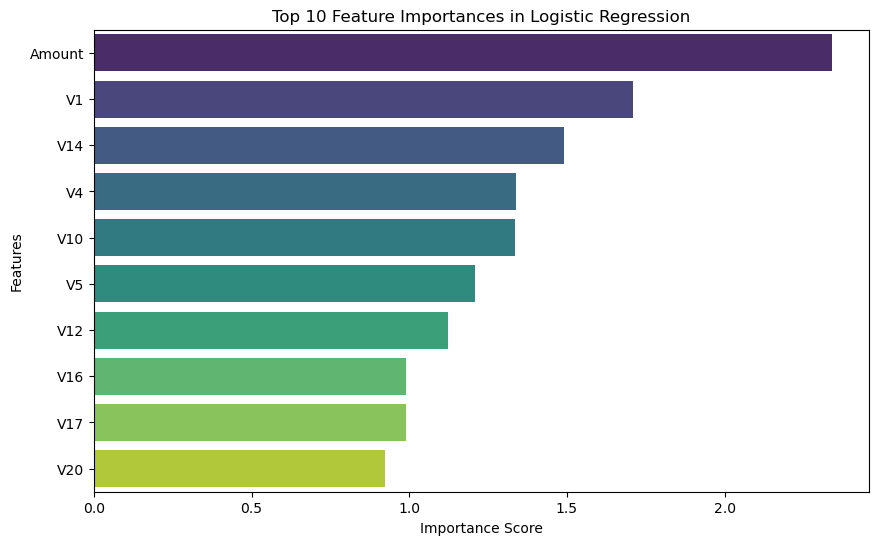

In [22]:
X = df.drop(columns=["Class"])
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

feature_importance_df = pd.DataFrame({
    'Feature': df.drop(columns=["Class"]).columns,
    'Importance': np.abs(log_reg.coef_[0]) 
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10), palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances in Logistic Regression")
plt.show()


##### with SMOTE


Model Performance Metrics:
Accuracy: 0.9806
Precision: 0.9907
Recall: 0.9702
F1-Score: 0.9804
ROC-AUC Score: 0.9975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



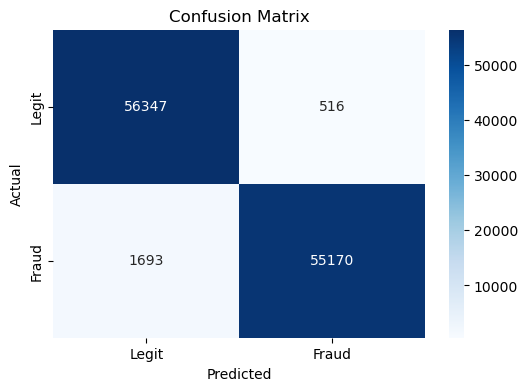


Top 10 Most Important Features:
   Feature  Importance
17     V17   10.087811
14     V14    9.506999
12     V12    7.567898
1       V1    6.506458
7       V7    5.802552
10     V10    5.220397
5       V5    4.707770
3       V3    3.620460
16     V16    3.221457
2       V2    3.019866


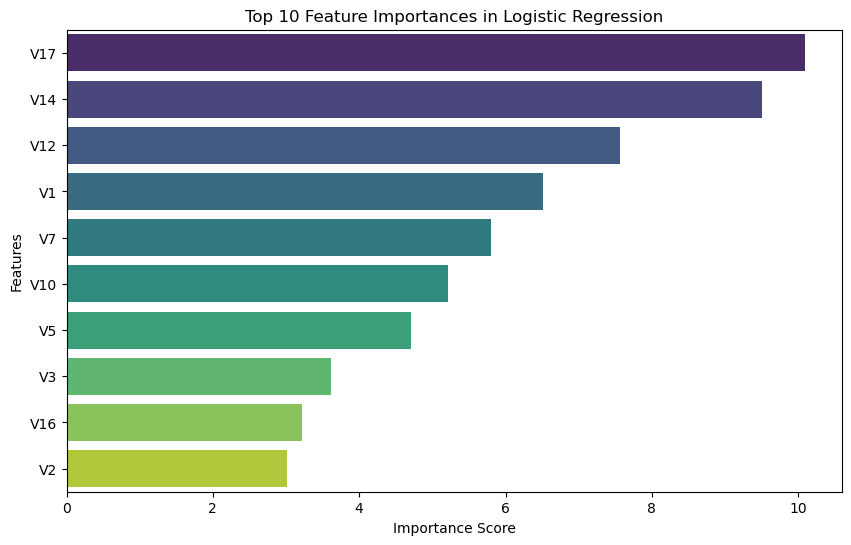

In [23]:
X = df_resampled.drop(columns=["Class"])
y = df_resampled["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

feature_importance_df = pd.DataFrame({
    'Feature': df.drop(columns=["Class"]).columns,
    'Importance': np.abs(log_reg.coef_[0]) 
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10), palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances in Logistic Regression")
plt.show()

##### final - hyperpara tuning

In [24]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs'], 
    'penalty': ['l1', 'l2'] 
}

valid_combinations = [
    ('liblinear', 'l1'),  
    ('liblinear', 'l2'),  
    ('lbfgs', 'l2') 
]

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': [solver for solver, penalty in valid_combinations],
    'penalty': [penalty for solver, penalty in valid_combinations]
}

In [25]:
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'penalty': ['l1', 'l2']},  # liblinear supports both l1 & l2
    {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs'], 'penalty': ['l2']}  # lbfgs only supports l2
]

In [26]:
param_grid 

[{'C': [0.01, 0.1, 1, 10, 100],
  'solver': ['liblinear'],
  'penalty': ['l1', 'l2']},
 {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs'], 'penalty': ['l2']}]

Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters Found: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Optimized Model Performance:
Accuracy: 0.9810
Precision: 0.9909
Recall: 0.9709
F1-Score: 0.9808
ROC-AUC Score: 0.9975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



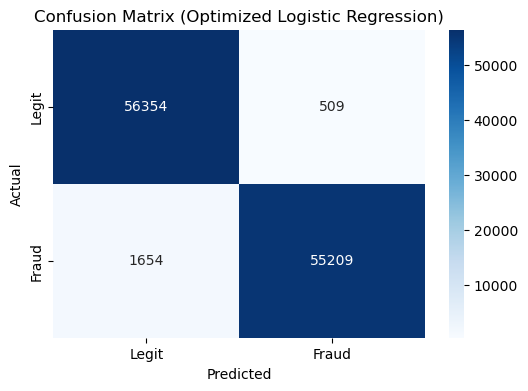


Top 10 Most Important Features After Optimization:
   Feature  Importance
17     V17   12.110418
14     V14   10.866196
7       V7    8.986754
12     V12    8.596665
1       V1    8.547216
5       V5    6.562834
3       V3    5.352970
10     V10    5.244793
2       V2    5.224392
29  Amount    3.991589


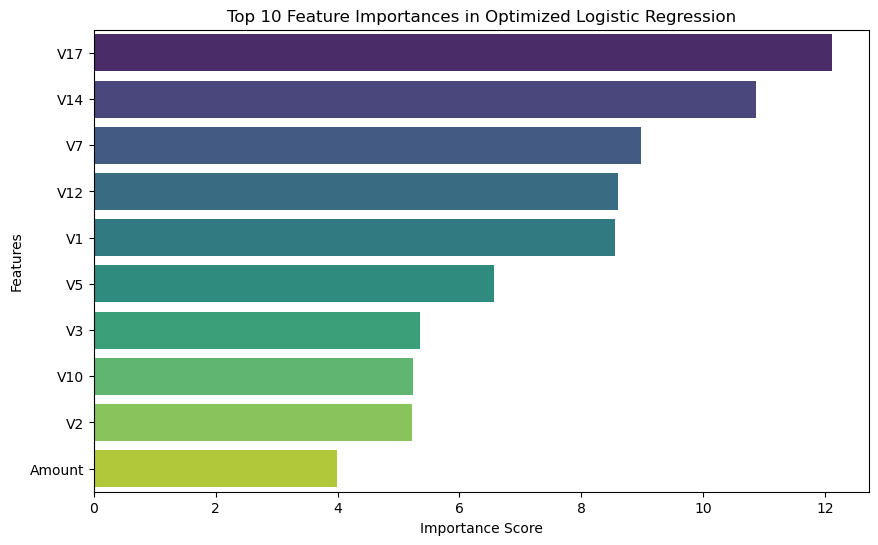

In [27]:
X = df_resampled.drop(columns=["Class"])
y = df_resampled["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

log_reg = LogisticRegression(class_weight='balanced', max_iter=500)

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters Found:", grid_search.best_params_)

best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nOptimized Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Optimized Logistic Regression)")
plt.show()

feature_importance_df = pd.DataFrame({
    'Feature': df_resampled.drop(columns=["Class"]).columns,
    'Importance': np.abs(best_log_reg.coef_[0]) 
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Most Important Features After Optimization:")
print(feature_importance_df.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10), palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances in Optimized Logistic Regression")
plt.show()


### SVM

##### without SMOTE

In [21]:
# X = df.drop(columns=["Class"])
# y = df["Class"]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
# svm_model.fit(X_train, y_train)

# y_pred = svm_model.predict(X_test)
# y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_proba)

# print("\nModel Performance Metrics:")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-Score: {f1:.4f}")
# print(f"ROC-AUC Score: {roc_auc:.4f}")

# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# plt.figure(figsize=(6,4))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - SVM Model")
# plt.show()


Model Performance Metrics:
Accuracy: 0.9794
Precision: 0.0715
Recall: 0.9184
F1-Score: 0.1327
ROC-AUC Score: 0.9747

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



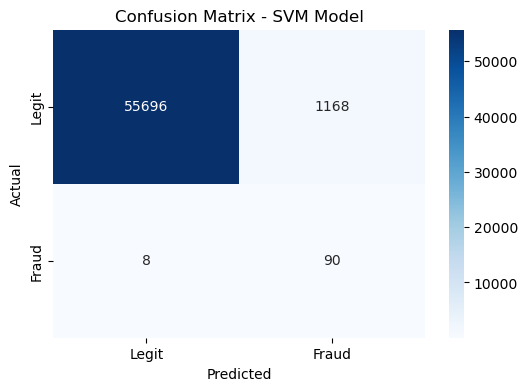

In [25]:
X = df.drop(columns=["Class"])
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

svm_model = LinearSVC(class_weight='balanced', max_iter=5000, random_state=42, dual=False)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

y_scores = svm_model.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_scores)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Model")
plt.show()

##### with SMOTE


Model Performance Metrics:
Accuracy: 0.9766
Precision: 0.9907
Recall: 0.9622
F1-Score: 0.9762
ROC-AUC Score: 0.9972

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     56863
           1       0.99      0.96      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



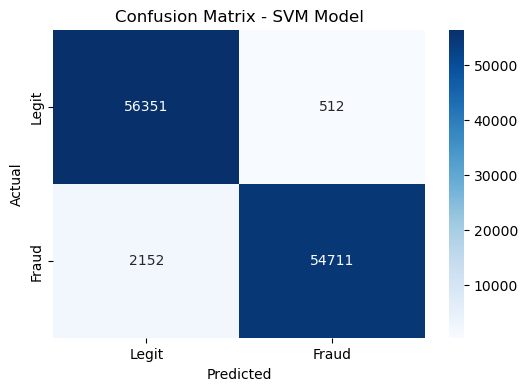

In [26]:
X = df_resampled.drop(columns=["Class"])
y = df_resampled["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

svm_model = LinearSVC(class_weight='balanced', max_iter=5000, random_state=42, dual=False)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

y_scores = svm_model.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_scores)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Model")
plt.show()

##### Hyperpara Tuning

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/siapatodia/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/siapatodia/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/siapatodia/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/siapatodia/anaconda3/lib/python3.11/site-packages/sklearn/svm/


Best Parameters Found: {'C': 100, 'loss': 'squared_hinge'}

Model Performance Metrics:
Accuracy: 0.9766
Precision: 0.9907
Recall: 0.9622
F1-Score: 0.9762
ROC-AUC Score: 0.9972

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     56863
           1       0.99      0.96      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



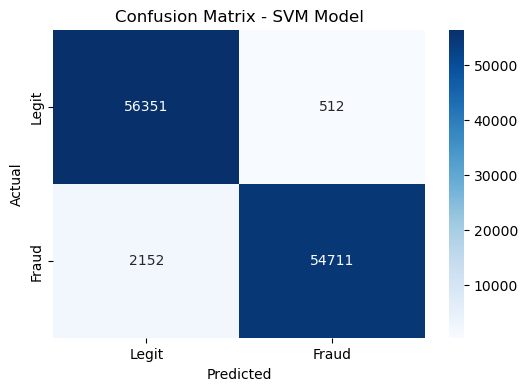

In [29]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'loss': ['hinge', 'squared_hinge']  
}

svm_model = LinearSVC(class_weight='balanced', max_iter=5000, random_state=42, dual=False)

grid_search = GridSearchCV(
    svm_model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters Found:", grid_search.best_params_)

best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

y_scores = grid_search.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_scores)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Model")
plt.show()

### SGD SVM

##### without SMOTE


Optimized SGD-SVM Model Performance:
Accuracy: 0.9991
Precision: 0.8333
Recall: 0.6122
F1-Score: 0.7059
ROC-AUC Score: 0.9624

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.61      0.71        98

    accuracy                           1.00     56962
   macro avg       0.92      0.81      0.85     56962
weighted avg       1.00      1.00      1.00     56962



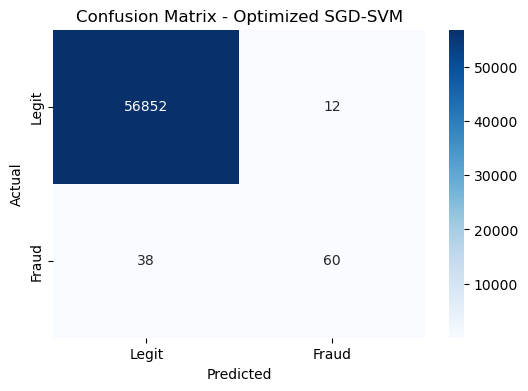

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

X = df.drop(columns=["Class"])
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

sgd_svm = SGDClassifier(loss="hinge", penalty="l2", alpha=0.0001, max_iter=1000, tol=1e-3, class_weight="balanced", random_state=42)
sgd_svm_calibrated = CalibratedClassifierCV(sgd_svm, cv=5)

sgd_svm_calibrated.fit(X_train, y_train)

y_pred = sgd_svm_calibrated.predict(X_test)
y_pred_proba = sgd_svm_calibrated.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nOptimized SGD-SVM Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Optimized SGD-SVM")
plt.show()

##### with SMOTE


Optimized SGD-SVM Model Performance:
Accuracy: 0.9546
Precision: 0.9995
Recall: 0.9095
F1-Score: 0.9524
ROC-AUC Score: 0.9975

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56863
           1       1.00      0.91      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.96      0.95      0.95    113726
weighted avg       0.96      0.95      0.95    113726



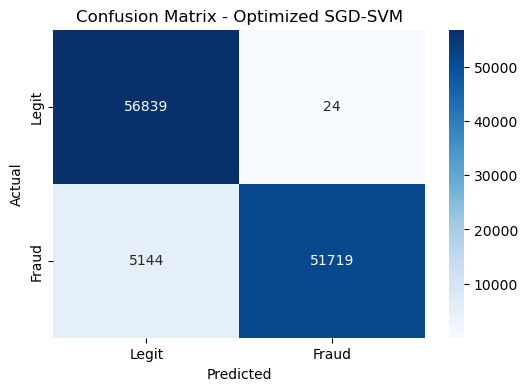

In [31]:
X = df_resampled.drop(columns=["Class"])
y = df_resampled["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

sgd_svm = SGDClassifier(loss="hinge", penalty="l2", alpha=0.0001, max_iter=1000, tol=1e-3, class_weight="balanced", random_state=42)
sgd_svm_calibrated = CalibratedClassifierCV(sgd_svm, cv=5)

sgd_svm_calibrated.fit(X_train, y_train)

y_pred = sgd_svm_calibrated.predict(X_test)
y_pred_proba = sgd_svm_calibrated.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nOptimized SGD-SVM Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Optimized SGD-SVM")
plt.show()

##### hyper-para tuning

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters Found: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}

Optimized and Calibrated SGD-SVM Model Performance:
Accuracy: 0.9548
Precision: 0.9996
Recall: 0.9100
F1-Score: 0.9527
ROC-AUC Score: 0.9976

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56863
           1       1.00      0.91      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.96      0.95      0.95    113726
weighted avg       0.96      0.95      0.95    113726



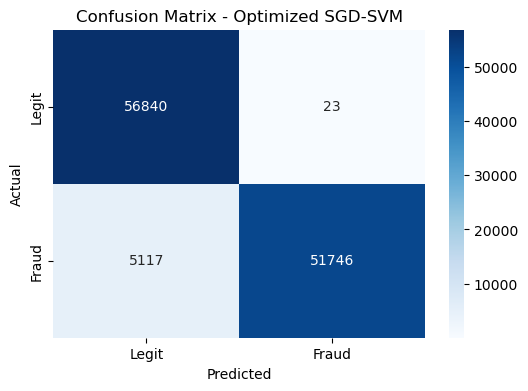

In [34]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1], 
    'loss': ['hinge'], 
    'penalty': ['l2', 'l1', 'elasticnet'], 
    'max_iter': [1000, 3000, 5000],  
}

sgd_svm = SGDClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    sgd_svm, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters Found:", grid_search.best_params_)

best_sgd_svm = grid_search.best_estimator_
best_sgd_svm_calibrated = CalibratedClassifierCV(best_sgd_svm, cv=5)
best_sgd_svm_calibrated.fit(X_train, y_train)
y_pred = best_sgd_svm_calibrated.predict(X_test)
y_pred_proba = best_sgd_svm_calibrated.predict_proba(X_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nOptimized and Calibrated SGD-SVM Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Optimized SGD-SVM")
plt.show()